# Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from pmdarima.arima import ADFTest
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data set
df = pd.read_excel('data/eth_api_data.xlsx')
col_name ='t'
df[col_name] = pd.to_datetime(df[col_name])
df.set_index(col_name, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2226 entries, 2015-08-08 to 2021-09-14
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               2226 non-null   int64  
 1   sending_count       2226 non-null   int64  
 2   receiving_count     2226 non-null   int64  
 3   active_count        2226 non-null   int64  
 4   new_non_zero_count  2226 non-null   int64  
 5   block_height        2226 non-null   int64  
 6   sopr                2226 non-null   float64
 7   price_usd_close     2226 non-null   float64
 8   marketcap_usd       2226 non-null   float64
 9   difficulty_latest   2226 non-null   int64  
 10  hash_rate_mean      2226 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 208.7 KB


In [3]:
df.isna().sum()

count                 0
sending_count         0
receiving_count       0
active_count          0
new_non_zero_count    0
block_height          0
sopr                  0
price_usd_close       0
marketcap_usd         0
difficulty_latest     0
hash_rate_mean        0
dtype: int64

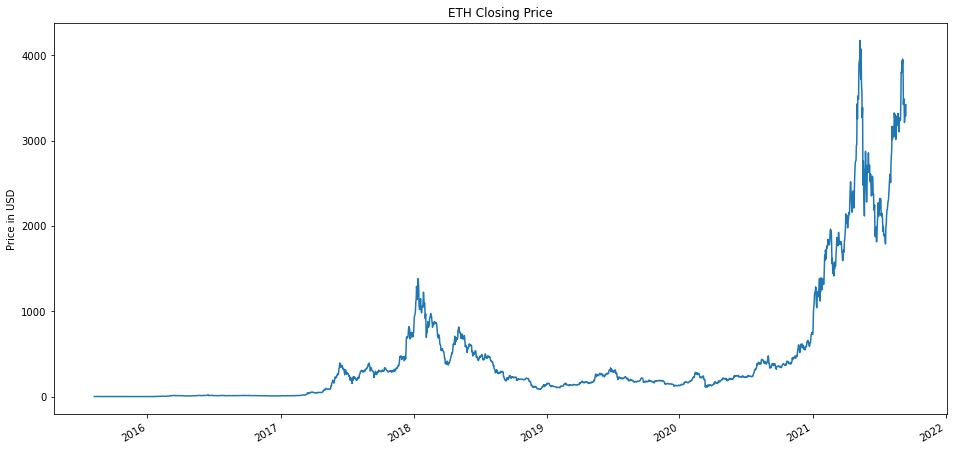

In [4]:
# Looking at historical closing price
ax = plt.axes()
df['price_usd_close'].plot(figsize=(16,8), title='ETH Closing Price', ylabel='Price in USD', xlabel='')
plt.rc('font', size=14)
plt.rc('axes', titlesize=20)
plt.grid(False)
ax.set_facecolor("white");

### Checking for Stationarity

In [5]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['price_usd_close'])

(0.99, True)

Since the p-value is above .05, the data does not pass the stationarity test. I will difference the data so that it meets the criteria for stationarity.

In [6]:
adf_test.should_diff(df['price_usd_close'].diff().dropna())

(0.01, False)

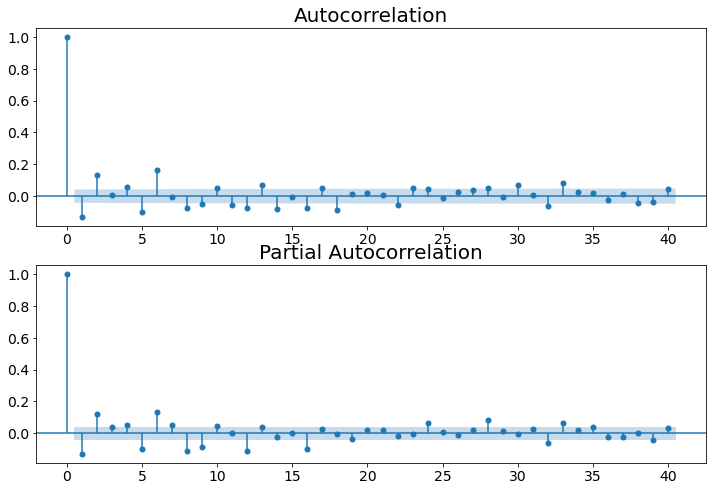

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['price_usd_close'].diff().dropna().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['price_usd_close'].diff().dropna(), lags=40, ax=ax2)

### Looking at Trend and Seasonality

In [8]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

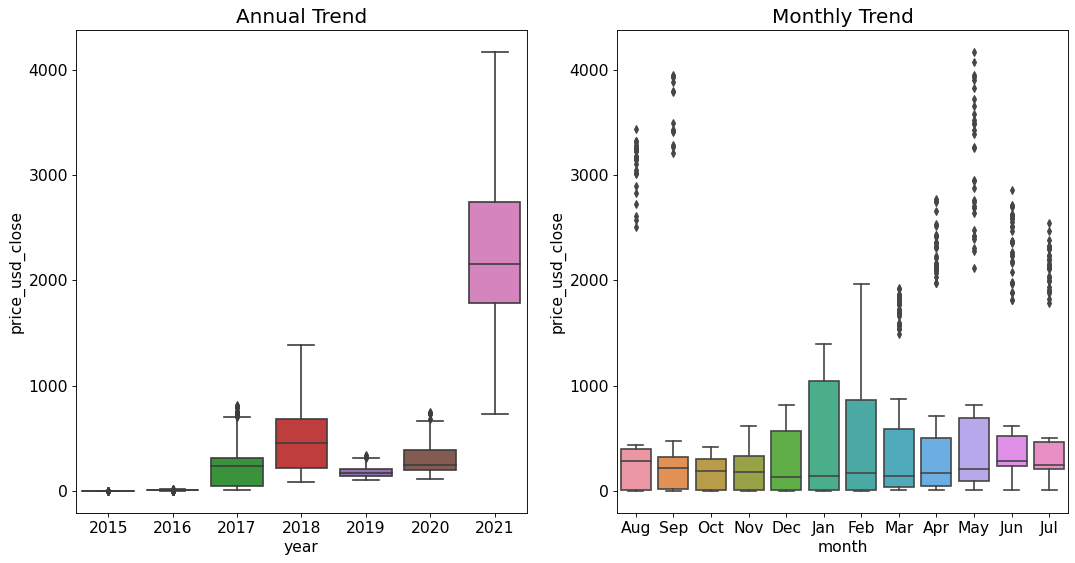

In [9]:
slc = slc= (df['year'] > 2014) & (df['year'] <= 2021)

fig, axes = plt.subplots(1, 2, figsize=(16,8), dpi= 80)
sns.boxplot(x='year', y='price_usd_close', data=df.loc[slc], ax=axes[0])
sns.boxplot(x='month', y='price_usd_close', data=df.loc[slc])

# Set Title
axes[0].set_title('Annual Trend', fontsize=18); 
axes[1].set_title('Monthly Trend', fontsize=18)
plt.show()

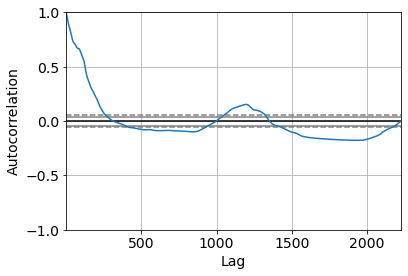

In [10]:
autocorrelation_plot(df['price_usd_close']);

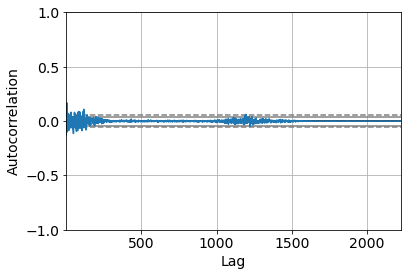

In [11]:
autocorrelation_plot(df['price_usd_close'].diff().dropna());